In [265]:
%load_ext sql
%matplotlib inline
%sql postgresql://appdev@data:5432/appdev

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


'Connected: appdev@appdev'

In [102]:
import sqlalchemy
from sqlalchemy import create_engine
engine = create_engine('postgresql://appdev@data/appdev', echo=True)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [32]:
%%sql SELECT * FROM geonames
order by population desc
LIMIT 1;

1 rows affected.


[(305104, 'Levant', 36.0, 34.0, 'L', 'RGN', None, None, None, 44990000, None, 'Asia/Beirut')]

In [66]:
%%sql SELECT Point(36.0,34.0) <-> Point(longitude,latitude) as "distance",geonameid,name FROM geonames
order by distance asc
LIMIT 10;

10 rows affected.


[(0.0, 305104, 'Levant'),
 (0.0129523588585232, 6271836, 'Ard Taraya'),
 (0.0399076559071088, 273689, 'Njâsset el Aaoujâ'),
 (0.0565699284072415, 6271845, 'El Mâred'),
 (0.0797932553540693, 6276938, 'Machraa Tem el Qboûr'),
 (0.0902906999640604, 433496, 'Sahlêt el Bayâder'),
 (0.0917604370085532, 266378, 'Dahr Ouâdi ed Dabboûr'),
 (0.108690022541169, 6271821, 'Ed Darjé'),
 (0.111114000018, 269644, 'Dahr el Qadîb'),
 (0.117548193520785, 272981, 'Jouar es Souâaîr')]

In [266]:
%%sql select asin(
sqrt(
sin(radians(34-latitude)/2)^2 +
    sin(radians(36-longitude)/2)^2 *
    cos(radians(latitude)) *
    cos(radians(34))

)) * 12756.2 as "distance in km",geonameid,name FROM geonames
order by "distance in km" asc
LIMIT 10;

10 rows affected.


[(0.0, 305104, 'Levant'),
 (1.3641860630566, 6271836, 'Ard Taraya'),
 (3.74756593908423, 273689, 'Njâsset el Aaoujâ'),
 (5.77715248210322, 6271845, 'El Mâred'),
 (7.37838323237415, 6276938, 'Machraa Tem el Qboûr'),
 (9.69401448457124, 266378, 'Dahr Ouâdi ed Dabboûr'),
 (10.0343344184573, 6271821, 'Ed Darjé'),
 (10.05068486529, 433496, 'Sahlêt el Bayâder'),
 (11.653766322323, 269644, 'Dahr el Qadîb'),
 (12.5233737182432, 269691, 'Qabr ed Derzi')]

In [175]:
result = %sql select latitude, longitude, population FROM geonames order by population desc LIMIT 1000;

1000 rows affected.


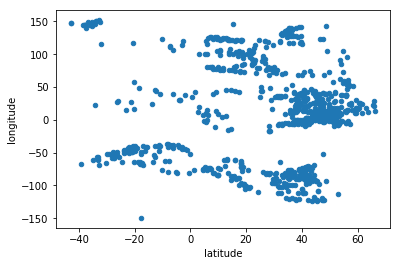

In [176]:
df = pd.DataFrame(result, columns=['latitude', 'longitude','pop'])
df.plot.scatter(x='latitude', y='longitude')

In [179]:
%sql SELECT data FROM cards WHERE data @> '{"artist":"Rob Alexander"}';

401 rows affected.


[({'id': '4a7bf234af44e07d9a159d4d89e96ce320919917', 'cmc': 6, 'name': 'Beacon of Immortality', 'text': "Double target player's life total. Shuffle Beac ... (253 characters truncated) ... '10', 'rarity': 'Rare', 'manaCost': '{5}{W}', 'imageName': 'beacon of immortality', 'mciNumber': '10', 'multiverseid': 130553, 'colorIdentity': ['W']},),
 ({'id': '9cea331c080c3bbc7987c6560f65e39e9d1ed34f', 'cmc': 5, 'name': 'Kavu Climber', 'text': 'When Kavu Climber enters the battlefield, draw a card.', ... (348 characters truncated) ...  '{3}{G}{G}', 'subtypes': ['Kavu'], 'imageName': 'kavu climber', 'mciNumber': '273', 'toughness': '3', 'multiverseid': 129511, 'colorIdentity': ['G']},),
 ({'id': '28cc7c79cca8939fd9661f7abfc6ca453715b75e', 'cmc': 0, 'name': 'Llanowar Wastes', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {B} or {G}  ... (131 characters truncated) ...  'normal', 'number': '355', 'rarity': 'Rare', 'imageName': 'llanowar wastes', 'mciNumber': '355', 'multiverseid': 129627, 'colorIdentity': ['B', 'G']},),
 ({'id': '7a90b7ba6197f8774ed99ecf75ac9abb3e0c0f20', 'cmc': 0, 'name': 'Shivan Reef', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {U} or {R} to y ... (119 characters truncated) ... ut': 'normal', 'number': '357', 'rarity': 'Rare', 'imageName': 'shivan reef', 'mciNumber': '357', 'multiverseid': 129731, 'colorIdentity': ['U', 'R']},),
 ({'id': '8d1035f151615c949d0645b70fe01d8ab4a3f796', 'cmc': 0, 'name': 'Sulfurous Springs', 'text': '{T}: Add {C} to your mana pool.\n{T}: Add {B} or {R ... (137 characters truncated) ... normal', 'number': '359', 'rarity': 'Rare', 'imageName': 'sulfurous springs', 'mciNumber': '359', 'multiverseid': 129751, 'colorIdentity': ['B', 'R']},),
 ({'id': 'c97103ab834aad9b3fb7d07c4fb563089f97fe87', 'cmc': 0, 'name': 'Treetop Village', 'text': "Treetop Village enters the battlefield tapped.\n{T}:  ... (359 characters truncated) ... : 'normal', 'number': '361', 'rarity': 'Uncommon', 'imageName': 'treetop village', 'mciNumber': '361', 'multiverseid': 106455, 'colorIdentity': ['G']},),
 ({'id': '24a47bf9cb4596246501294e7127bf74e082bc1d', 'cmc': 0, 'name': 'Plains', 'type': 'Basic Land — Plains', 'types': ['Land'], 'artist': 'Rob Alexan ... (99 characters truncated) ... me': 'plains1', 'watermark': 'White', 'supertypes': ['Basic'], 'variations': [129682, 129683, 129681], 'multiverseid': 129680, 'colorIdentity': ['W']},),
 ({'id': 'be5e30798e4f8b9b6f6e6a8dd2e30bf86bb04b94', 'cmc': 0, 'name': 'Forest', 'type': 'Basic Land — Forest', 'types': ['Land'], 'artist': 'Rob Alexan ... (99 characters truncated) ... me': 'forest3', 'watermark': 'Green', 'supertypes': ['Basic'], 'variations': [129559, 129562, 129560], 'multiverseid': 129561, 'colorIdentity': ['G']},),
 ({'id': '4c3d9f2b7086021880c8268f9def8f7548116d17', 'cmc': 0, 'name': 'Badlands', 'text': '({T}: Add {B} or {R} to your mana pool.)', 'type': 'Land — S ... (97 characters truncated) ... ', 'reserved': True, 'subtypes': ['Swamp', 'Mountain'], 'imageName': 'badlands', 'mciNumber': '278', 'multiverseid': 878, 'colorIdentity': ['B', 'R']},),
 ({'id': '3ad1eecb97909f6d45763cc87c07fa23cf574cf7', 'cmc': 1, 'name': 'Lance', 'text': 'Enchant creature\nEnchanted creature has first strike.', 'type' ... (117 characters truncated) ...  'rarity': 'Uncommon', 'manaCost': '{W}', 'subtypes': ['Aura'], 'imageName': 'lance', 'mciNumber': '212', 'multiverseid': 856, 'colorIdentity': ['W']},),
 ({'id': '372383e545f466edb88777a0d982ee4e488bcdc1', 'cmc': 0, 'name': 'Savannah', 'text': '({T}: Add {G} or {W} to your mana pool.)', 'type': 'Land — F ... (95 characters truncated) ... e', 'reserved': True, 'subtypes': ['Forest', 'Plains'], 'imageName': 'savannah', 'mciNumber': '293', 'multiverseid': 881, 'colorIdentity': ['W', 'G']},),
 ({'id': 'de3f9e2afb8cc08ae524427967d2a0bcc6a9bbff', 'cmc': 0, 'name': 'Taiga', 'text': '({T}: Add {R} or {G} to your mana pool.)', 'type': 'Land — Moun ... (93 characters truncated) ... re', 'reserved': True, 'subtypes': ['Mountain', 'Forest

In [263]:
%%sql SELECT * FROM cards 
WHERE data @> '{"subtypes":["Human"]}'

3192 rows affected.


[('10E', {'id': 'ab1ab474019e4e76c66e2b524d354cb7c3212616', 'cmc': 7, 'name': "Ancestor's Chosen", 'text': "First strike (This creature deals combat damage bef ... (386 characters truncated) ... 'subtypes': ['Human', 'Cleric'], 'imageName': "ancestor's chosen", 'mciNumber': '1', 'toughness': '4', 'multiverseid': 130550, 'colorIdentity': ['W']}),
 ('10E', {'id': 'd3488c0a916bd922856473155a8b49ec23fc2217', 'cmc': 4, 'name': 'Ballista Squad', 'text': '{X}{W}, {T}: Ballista Squad deals X damage to target a ... (297 characters truncated) ... }', 'subtypes': ['Human', 'Rebel'], 'imageName': 'ballista squad', 'mciNumber': '8', 'toughness': '2', 'multiverseid': 129477, 'colorIdentity': ['W']}),
 ('10E', {'id': '29c46fca29e5de01dba3bbf05393325bc9132735', 'cmc': 3, 'name': 'Benalish Knight', 'text': 'Flash (You may cast this spell any time you could cas ... (402 characters truncated) ...  'subtypes': ['Human', 'Knight'], 'imageName': 'benalish knight', 'mciNumber': '11', 'toughness': '2', 'multiverseid': 136279, 'colorIdentity': ['W']}),
 ('10E', {'id': 'e8b8dea65daf4e9070cce5de62bdbea0bf36d47c', 'cmc': 4, 'name': 'Cho-Manno, Revolutionary', 'text': 'Prevent all damage that would be dealt to Ch ... (361 characters truncated) ... geName': 'cho-manno, revolutionary', 'mciNumber': '12', 'toughness': '2', 'supertypes': ['Legendary'], 'multiverseid': 130554, 'colorIdentity': ['W']}),
 ('10E', {'id': '80a6b907fc380ed97615e8abc0fe6071c4ceef67', 'cmc': 3, 'name': 'Field Marshal', 'text': 'Other Soldier creatures get +1/+1 and have first strike ... (371 characters truncated) ... , 'subtypes': ['Human', 'Soldier'], 'imageName': 'field marshal', 'mciNumber': '15', 'toughness': '2', 'multiverseid': 135258, 'colorIdentity': ['W']}),
 ('10E', {'id': '7879b835a2c3d6516515d03bd3a3894dceee1812', 'cmc': 1, 'name': 'Honor Guard', 'text': '{W}: Honor Guard gets +0/+1 until end of turn.', 'type':  ... (239 characters truncated) ... }', 'subtypes': ['Human', 'Soldier'], 'imageName': 'honor guard', 'mciNumber': '23', 'toughness': '1', 'multiverseid': 129595, 'colorIdentity': ['W']}),
 ('10E', {'id': '55932565b6905650e67e784b7cf0df63990e9851', 'cmc': 1, 'name': 'Icatian Priest', 'text': '{1}{W}{W}: Target creature gets +1/+1 until end of tur ... (382 characters truncated) ... , 'subtypes': ['Human', 'Cleric'], 'imageName': 'icatian priest', 'mciNumber': '24', 'toughness': '1', 'multiverseid': 132123, 'colorIdentity': ['W']}),
 ('10E', {'id': 'bc1e197c295bc12cc1b392a11b94782f1396b263', 'cmc': 5, 'name': 'Kjeldoran Royal Guard', 'text': '{T}: All combat damage that would be dealt to y ... (409 characters truncated) ... pes': ['Human', 'Soldier'], 'imageName': 'kjeldoran royal guard', 'mciNumber': '25', 'toughness': '5', 'multiverseid': 130551, 'colorIdentity': ['W']}),
 ('10E', {'id': 'e25120395df829af067675f1582ae946543094e2', 'cmc': 1, 'name': 'Loyal Sentry', 'text': 'When Loyal Sentry blocks a creature, destroy that creatu ... (318 characters truncated) ... ', 'subtypes': ['Human', 'Soldier'], 'imageName': 'loyal sentry', 'mciNumber': '27', 'toughness': '1', 'multiverseid': 129798, 'colorIdentity': ['W']}),
 ('10E', {'id': 'f0bd8f9ffd23760499a421ca4cd2f211130542b8', 'cmc': 3, 'name': 'Nomad Mythmaker', 'text': '{W}, {T}: Put target Aura card from a graveyard onto  ... (412 characters truncated) ... s': ['Human', 'Nomad', 'Cleric'], 'imageName': 'nomad mythmaker', 'mciNumber': '30', 'toughness': '2', 'multiverseid': 130547, 'colorIdentity': ['W']}),
 ('10E', {'id': '1db7581f31be9c7a2de25510463bc967e2d162f3', 'cmc': 3, 'name': 'Paladin en-Vec', 'text': "First strike, protection from black and from red (This ... (501 characters truncated) ... , 'subtypes': ['Human', 'Knight'], 'imageName': 'paladin en-vec', 'mciNumber': '32', 'toughness': '2', 'multiverseid': 129668, 'colorIdentity': ['W']}),
 ('10E', {'id': '2f40052abfd749583409d314c6bc06132eceb6ce', 'cmc': 2, 'name': 'Samite Healer', 'text': '{T}: Prevent the next 1 damage that would be dealt to t ... (414 cha

In [258]:
%%sql SELECT count(*),data ->> 'colors' FROM cards 
group by data ->> 'colors'
order by count desc

32 rows affected.


[(7391, None),
 (4977, '["Green"]'),
 (4877, '["Black"]'),
 (4858, '["Red"]'),
 (4755, '["White"]'),
 (4680, '["Blue"]'),
 (276, '["White", "Green"]'),
 (273, '["Red", "Green"]'),
 (260, '["Blue", "Black"]'),
 (258, '["Black", "Red"]'),
 (245, '["White", "Blue"]'),
 (185, '["Black", "Green"]'),
 (182, '["Blue", "Red"]'),
 (178, '["White", "Red"]'),
 (174, '["White", "Black"]'),
 (169, '["Blue", "Green"]'),
 (73, '["Blue", "Black", "Red"]'),
 (57, '["White", "Blue", "Black"]'),
 (54, '["White", "Red", "Green"]'),
 (53, '["White", "Blue", "Green"]'),
 (52, '["Black", "Red", "Green"]'),
 (37, '["White", "Blue", "Black", "Red", "Green"]'),
 (33, '["White", "Black", "Red"]'),
 (28, '["White", "Black", "Green"]'),
 (25, '["Blue", "Red", "Green"]'),
 (24, '["Blue", "Black", "Green"]'),
 (22, '["White", "Blue", "Red"]'),
 (3, '["Blue", "Black", "Red", "Green"]'),
 (2, '["White", "Black", "Red", "Green"]'),
 (2, '["White", "Blue", "Black", "Green"]'),
 (2, '["White", "Blue", "Red", "Green"]'),
 (2, '["White", "Blue", "Black", "Red"]')]